# Mini Project - JSON
###### Author: Ashley Jiangyang
****
+ Practice working with the JSON format using a real life data set
+ Extract and manipulate data in JSON
+ Demostrate data wrangling skills
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
# Import Packages
import pandas as pd
import json

In [2]:
# load json as Pandas dataframe and preview the data
json_df = pd.read_json('data/world_bank_projects.json')
json_df.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [3]:
# Import Package
from collections import defaultdict

## Use defaultdict ti initial empty dictionary 
them_count = defaultdict(int)
for them in json_df.loc[0]['mjsector_namecode']:
    if them in json_df.loc[0]['mjsector_namecode']:
        them_count[them['name']] += 1 
    else:
        them_count[them['name']]  = 1

In [4]:
#1.Find the 10 countries with most projects
# In this dataset, each row represents a project, 
# To find the top 10 countries with projects, we will aggregate the project records for each country
top_10_country = json_df.countryname.dropna().value_counts().nlargest(10)
top_10_country

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

In [5]:
#2. Find the top 10 major project themes (using column 'mjtheme_namecode')
# we will define a function to iterate over the colums 'mjtheme_namecode' to count the numbers of occurance for each project 

## Define count_entries()

def count_entries(df, col_name):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    # Initialize an empty dictionary: cols_count
    theme_count = defaultdict(int)
    col = df[col_name]
    # Iterate over the column in dataframe
    for entry in col:
        for theme in entry:
        # If entry is in cols_count, add 1
            if theme in entry:
                theme_count[theme['name']] += 1
           # Return the cols_count dictionary
            else:
                theme_count[theme['name']] = 1
            
    return theme_count

count =  count_entries(json_df, 'mjtheme_namecode')
count

defaultdict(int,
            {'Human development': 197,
             '': 122,
             'Economic management': 33,
             'Social protection and risk management': 158,
             'Trade and integration': 72,
             'Public sector governance': 184,
             'Environment and natural resources management': 223,
             'Social dev/gender/inclusion': 119,
             'Financial and private sector development': 130,
             'Rural development': 202,
             'Urban development': 47,
             'Rule of law': 12})

In [6]:
# Sorting the data by the count value descendingly
sorted_count = sorted(((value, key) for (key,value) in count.items()), reverse = True)
top_10_theme = pd.DataFrame(sorted_count[0:10])
top_10_theme.columns = ['Count', 'Project Theme']

#Get the top 10 Rank Count with their Project Theme 
top_10_theme

,Count,Project Theme
0,223,Environment and natural resources management
1,202,Rural development
2,197,Human development
3,184,Public sector governance
4,158,Social protection and risk management
5,130,Financial and private sector development
6,122,
7,119,Social dev/gender/inclusion
8,72,Trade and integration
9,47,Urban development


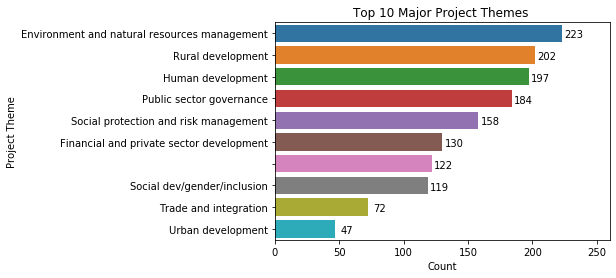

In [9]:
#Plot the Top 10 Major Project Theme in the bar plot
import matplotlib.pyplot as plt
import seaborn as sns

## Create plot
splot = sns.barplot(x="Count", y="Project Theme", data=top_10_theme)
## Adding text
for p in splot.patches:
    width = p.get_width()
    splot.text(width + 9  ,
            p.get_y()+p.get_height()/2. + 0.2,
            '{:1.0f}'.format(width),
            ha="center")
## Adding title
splot.set_title("Top 10 Major Project Themes ")  

plt.xlim(0,260)
plt.show()     


In [10]:
#3. In 2. above you will notice that some entries have only the code and the name is missing. 
# Create a dataframe with the missing names filled in.

# preview the 'mjtheme_namecode' column
json_df['mjtheme_namecode']

0      [{'code': '8', 'name': 'Human development'}, {...
1      [{'code': '1', 'name': 'Economic management'},...
2      [{'code': '5', 'name': 'Trade and integration'...
3      [{'code': '7', 'name': 'Social dev/gender/incl...
4      [{'code': '5', 'name': 'Trade and integration'...
                             ...                        
495    [{'code': '4', 'name': 'Financial and private ...
496    [{'code': '8', 'name': 'Human development'}, {...
497    [{'code': '10', 'name': 'Rural development'}, ...
498    [{'code': '10', 'name': 'Rural development'}, ...
499    [{'code': '9', 'name': 'Urban development'}, {...
Name: mjtheme_namecode, Length: 500, dtype: object

In [11]:
# create a reference dictionary with all the code-name pairs
reference = {}
for entry in json_df['mjtheme_namecode']:
    for item in entry:
        if item['name'] == '':
            continue
        elif item['name'] not in reference:
            reference[item['code']] = item['name']
            
reference

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [12]:
# Fill out the missing name according to the reference dictionary
json_df_full = json_df.copy()

for entry in json_df_full['mjtheme_namecode']:
    for item in entry:
        if item['name'] == '':
            item['name'] = reference[item['code']]

In [13]:
count_full =  count_entries(json_df_full, 'mjtheme_namecode')
count_full

defaultdict(int,
            {'Human development': 210,
             'Environment and natural resources management': 250,
             'Economic management': 38,
             'Social protection and risk management': 168,
             'Trade and integration': 77,
             'Public sector governance': 199,
             'Social dev/gender/inclusion': 130,
             'Financial and private sector development': 146,
             'Rural development': 216,
             'Urban development': 50,
             'Rule of law': 15})

In [14]:
# Sorting filled data descendingly
sorted_count_full = sorted(((value, key) for (key,value) in count_full.items()), reverse = True)

# Original counts 
orginal_count = pd.DataFrame(sorted_count)
orginal_count.columns = ['Count', 'Project Theme']

# Filled counts
full_count = pd.DataFrame(sorted_count_full)
full_count.columns = ['Count', 'Project Theme']

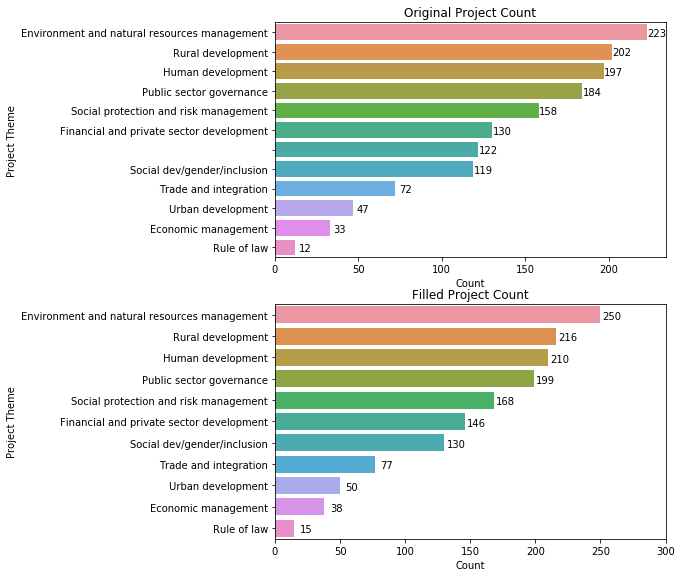

In [15]:
# Plot the filled data
# compare the counts before vs. after filling-out

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(7,9.5))
# Original Project Count
p1=sns.barplot(x="Count", y="Project Theme", data = orginal_count,ax=ax1)
for p in p1.patches:
    width = p.get_width()
    p1.text(width + 6  ,
            p.get_y()+p.get_height()/2. + 0.2,
            '{:1.0f}'.format(width),
            ha="center")
p1.set_title("Original Project Count")

# Filled Project Count
p2=sns.barplot(x="Count", y="Project Theme", data = full_count,ax=ax2)
for p in p2.patches:
    width = p.get_width()
    p2.text(width + 9  ,
            p.get_y()+p.get_height()/2. + 0.2,
            '{:1.0f}'.format(width),
            ha="center")
p2.set_title("Filled Project Count")

plt.xlim(0,300)
plt.show() 